In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import numpy as np
import seaborn as sns

rdv_hosp = pd.read_csv('rdv_hosp.csv')
nordv_hosp = pd.read_csv('nordv_hosp.csv')


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (64,72,74,76,78,80,82) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


25.03
(143, 34)


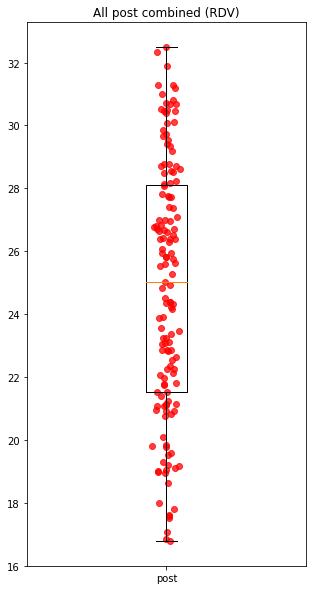

In [49]:
#plotting 
import numpy as np
plt.figure(figsize = [5,10])
onesamplepost = rdv_hosp[(rdv_hosp['sample_type']=='one_sample_post')]
multsamplepost = rdv_hosp[(rdv_hosp['sample_type']=='multiple_sample_post')]
to_drop = []
for mrn in multsamplepost['mrn'].unique():
    idx = list(multsamplepost[multsamplepost['mrn']==mrn].sort_values(by = 'sample_date').index[1:])
    to_drop.extend(idx)
multsamplepost = multsamplepost.drop(to_drop)
postdf = pd.concat([onesamplepost, multsamplepost])
print(postdf['ct_n1'].median())
plt.boxplot(postdf['ct_n1'].dropna(), labels = ['post'])

jitters = np.random.normal(1 , 0.02, postdf[(postdf['sample_type']=='multiple_sample_post')]['ct_n1'].dropna().shape[0])
plt.scatter(jitters, postdf[(postdf['sample_type']=='multiple_sample_post')]['ct_n1'].dropna(), alpha = 0.75, color = 'red', label = 'multisample')


jitters = np.random.normal(1 , 0.02, postdf[(postdf['sample_type']=='one_sample_post')]['ct_n1'].dropna().shape[0])
plt.scatter(jitters, postdf[(postdf['sample_type']=='one_sample_post')]['ct_n1'].dropna(), alpha = 0.75, color = 'red',  label = 'onesample')
print(postdf.shape)

# print(len(postdf[(postdf['sample_type']=='multiple_sample_post')]['ct_n1'].dropna()))
# print(len(postdf[(postdf['sample_type']=='one_sample_post')]['ct_n1'].dropna()))

plt.title('All post combined (RDV)')
# plt.legend()
# plt.savefig('/Users/tlh4362/Desktop/CT_vals_post_rdv.eps', format = 'eps', bbox_inches = 'tight')
plt.show()
plt.close()

In [50]:
rdvct = postdf['ct_n1']

25.189999999999998
(170, 34)


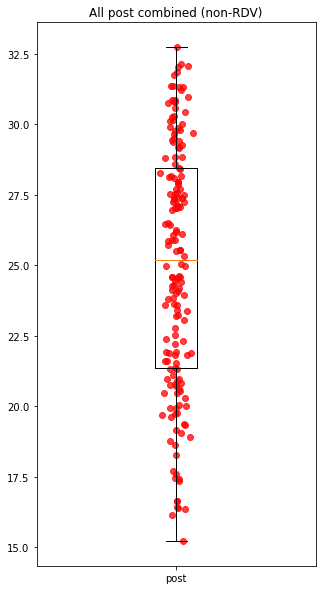

In [51]:
plt.figure(figsize = [5,10])
onesamplepost = nordv_hosp[(nordv_hosp['sample_type']=='one_sample_post')]
multsamplepost = nordv_hosp[(nordv_hosp['sample_type']=='multiple_sample_post')]
to_drop = []
for mrn in multsamplepost['mrn'].unique():
    idx = list(multsamplepost[multsamplepost['mrn']==mrn].sort_values(by = 'sample_date', ascending = False).index[1:])
    to_drop.extend(idx)
multsamplepost = multsamplepost.drop(to_drop)
postdf = pd.concat([onesamplepost, multsamplepost])
print(postdf['ct_n1'].median())
plt.boxplot(postdf['ct_n1'].dropna(), labels = ['post'])

jitters = np.random.normal(1 , 0.02, postdf[(postdf['sample_type']=='multiple_sample_post')].shape[0])
plt.scatter(jitters, postdf[(postdf['sample_type']=='multiple_sample_post')]['ct_n1'].dropna(), alpha = 0.75, color = 'red', label = 'multisample')

jitters = np.random.normal(1 , 0.02, postdf[(postdf['sample_type']=='one_sample_post')]['ct_n1'].dropna().shape[0])
plt.scatter(jitters, postdf[(postdf['sample_type']=='one_sample_post')]['ct_n1'].dropna(), alpha = 0.75, color = 'red',  label = 'onesample')

print(postdf.shape)
plt.title('All post combined (non-RDV)')
# plt.legend()
# plt.savefig('/Users/tlh4362/Desktop/CT_vals_post_nonrdv.eps', format = 'eps', bbox_inches = 'tight')

plt.show()
plt.close()

In [52]:
nordvct = postdf['ct_n1']

In [53]:
mannwhitneyu(rdvct, nordvct)

MannwhitneyuResult(statistic=11796.5, pvalue=0.6535283739910853)

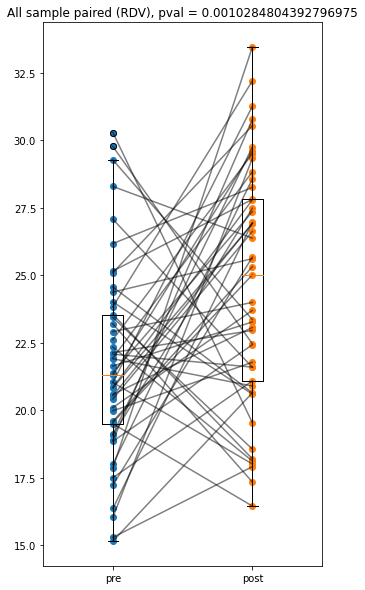

In [54]:
plt.figure(figsize = [5,10])

paired = rdv_hosp[rdv_hosp['sample_type']=='two_sample_paired']
multpaired = rdv_hosp[rdv_hosp['sample_type']=='three_plus_paired']
pairedf = pd.concat([paired,multpaired])
firstct = []
secondct = []
for mrn in pairedf['mrn'].unique():
    firstct.append(pairedf[pairedf['mrn']==mrn].sort_values(by = 'sample_date')['ct_n1'].iloc[0])
    secondct.append(pairedf[pairedf['mrn']==mrn].sort_values(by = 'sample_date')['ct_n1'].iloc[1])
    plt.plot([0,1], pairedf[(pairedf['mrn']==mrn)].sort_values(by = 'sample_date')['ct_n1'].iloc[0:2], color = 'black', alpha = 0.5)
plt.scatter([0]*len(firstct), firstct, color = 'tab:blue')

plt.scatter([1]*len(secondct), secondct, color = 'tab:orange')

plt.boxplot(pd.Series(firstct).dropna(), positions = [0], labels = ['pre'])
plt.boxplot(pd.Series(secondct).dropna(), positions = [1], labels = ['post'])

pval = mannwhitneyu(pd.Series(firstct).dropna(), pd.Series(secondct).dropna()).pvalue
plt.title('All sample paired (RDV), pval = {}'.format(pval))
# plt.savefig('/Users/tlh4362/Desktop/CT_vals_paired_rdv.eps', format = 'eps', bbox_inces = 'tight')
plt.show()
plt.close()




In [55]:
from scipy.stats import wilcoxon

wilcoxon(firstct, secondct).pvalue

0.0015608985496591288

In [56]:
rdvfirstct = firstct
rdvsecondct = secondct

23


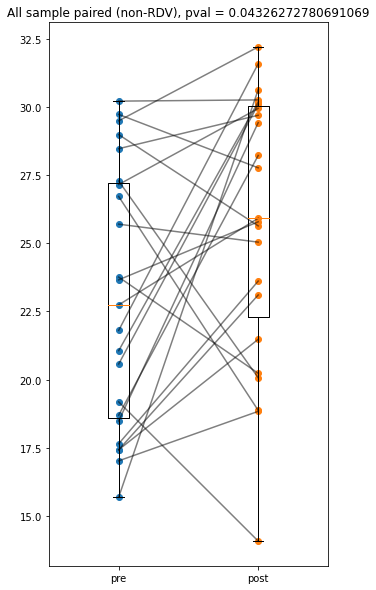

23


In [57]:
plt.figure(figsize = [5,10])

paired = nordv_hosp[nordv_hosp['sample_type']=='two_sample_paired']
multpaired = nordv_hosp[nordv_hosp['sample_type']=='three_plus_paired']
pairedf = pd.concat([paired,multpaired])
firstct = []
secondct = []
for mrn in pairedf['mrn'].unique():
    first = pairedf[pairedf['mrn']==mrn].sort_values(by = 'sample_date')['ct_n1'].iloc[0]
    second = pairedf[pairedf['mrn']==mrn].sort_values(by = 'sample_date')['ct_n1'].iloc[-1]
    firstct.append(pairedf[pairedf['mrn']==mrn].sort_values(by = 'sample_date')['ct_n1'].iloc[0])
    secondct.append(pairedf[pairedf['mrn']==mrn].sort_values(by = 'sample_date')['ct_n1'].iloc[-1])
    plt.plot([0,1], [first,second] , color = 'black', alpha = 0.5)
plt.scatter([0]*len(firstct), firstct, color = 'tab:blue')

plt.scatter([1]*len(secondct), secondct, color = 'tab:orange')

plt.boxplot(pd.Series(firstct).dropna(), positions = [0], labels = ['pre'])
plt.boxplot(pd.Series(secondct).dropna(), positions = [1], labels = ['post'])
pval = mannwhitneyu(pd.Series(firstct).dropna(), pd.Series(secondct).dropna()).pvalue
print(len(firstct))
plt.title('All sample paired (non-RDV), pval = {}'.format(pval))
# plt.savefig('/Users/tlh4362/Desktop/CT_vals_paired_nonrdv.eps', format = 'eps', bbox_inches = 'tight')

plt.show()
plt.close()

print(len(firstct))


In [58]:
from scipy.stats import wilcoxon

wilcoxon(firstct, secondct).pvalue

0.052229881286621094

In [59]:
nordvfirstct = firstct
nordvsecondct = secondct

In [60]:
mannwhitneyu(rdvfirstct, nordvfirstct)

MannwhitneyuResult(statistic=489.0, pvalue=0.37147065437980065)

In [61]:
mannwhitneyu(rdvsecondct, nordvsecondct)

MannwhitneyuResult(statistic=463.0, pvalue=0.22715393736364065)

In [62]:
rdvdiff_list = []
paired = rdv_hosp[(rdv_hosp['sample_type']=='two_sample_paired')|(rdv_hosp['sample_type']=='three_plus_paired')]
for mrn in paired['mrn'].unique():
    pt = paired[paired['mrn']==mrn].sort_values(by = 'sample_date')
#     print(pt.loc[:,['RDV', 'sample_date']])
    diff=pt['sample_date'].iloc[1] - pt['sample_date'].iloc[0]
    diff = diff.days
    rdvdiff_list.append(diff)

In [143]:
nordvdiff_list = []
paired = nordv_hosp[(nordv_hosp['sample_type']=='two_sample_paired')|(nordv_hosp['sample_type']=='three_plus_paired')]
for mrn in paired['mrn'].unique():
    pt = paired[paired['mrn']==mrn].sort_values(by = 'sample_date')
    print(pt.loc[:,['sample_date']])
#     print(pt.loc[:,['RDV', 'sample_date']])
    diff=pt['sample_date'].iloc[-1] - pt['sample_date'].iloc[0]
    diff = diff.days
    nordvdiff_list.append(diff)

    sample_date
192  2020-12-15
193  2020-12-18
194  2020-12-24
   sample_date
15  2021-01-05
16  2021-01-18
17  2021-01-25
    sample_date
279  2021-03-04
280  2021-03-20
281  2021-03-26
    sample_date
203  2020-04-01
206  2020-04-11
207  2020-04-11
208  2020-04-11
204  2020-04-11
205  2020-04-20
    sample_date
219  2020-03-25
220  2020-03-27
222  2020-03-27
221  2020-04-04
    sample_date
236  2020-05-04
237  2020-05-06
238  2020-05-22
   sample_date
24  2020-04-25
25  2020-04-29
    sample_date
199  2020-08-07
200  2020-08-17
    sample_date
303  2021-09-29
304  2021-10-13
   sample_date
85  2021-01-07
86  2021-01-21
    sample_date
225  2020-04-08
226  2020-04-17
    sample_date
170  2021-05-17
171  2021-05-18
    sample_date
291  2021-04-29
292  2021-05-23
   sample_date
64  2021-05-27
65  2021-06-01
    sample_date
104  2020-04-12
103  2020-04-15
   sample_date
45  2021-07-30
46  2021-08-03
    sample_date
271  2021-01-05
272  2021-01-06
   sample_date
44  2020-03-27
43  2020-0

In [144]:
nordvdiff_list

[9, 20, 22, 19, 10, 18, 4, 10, 14, 14, 9, 1, 24, 5, 3, 4, 1, 1, 10, 1, 8, 5, 9]

In [145]:
tmpdf = pd.DataFrame([rdvdiff_list, nordvdiff_list], index = ['RDV', 'Control']).transpose()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

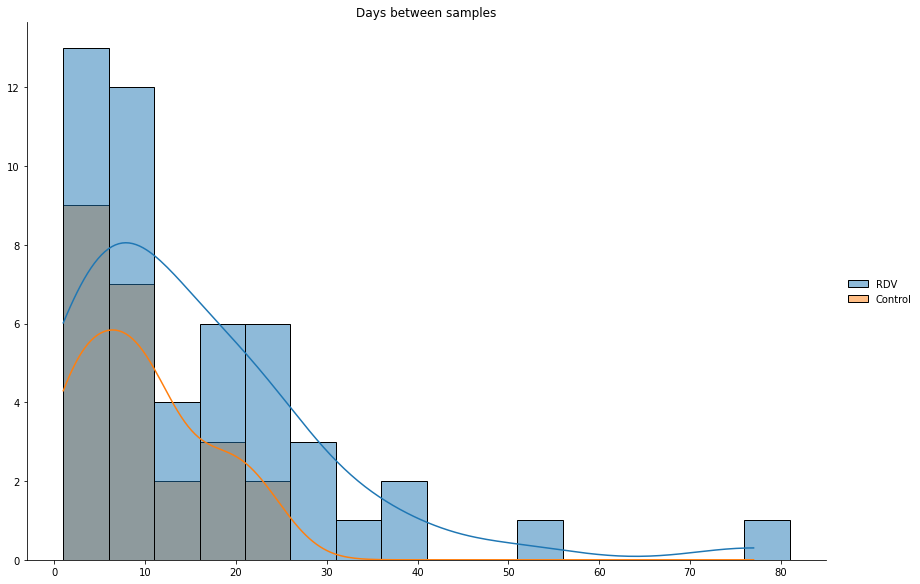

In [146]:
sns.displot(tmpdf, binwidth = 5, kde = True, height = 8, aspect = 1.5)
plt.title('Days between samples')
plt.ylabel('')
plt.savefig('/Users/tlh4362/Desktop//{}.eps'.format('Days between samples'), format = 'eps', bbox_inches = 'tight')
plt.show()
plt.close()


In [107]:
#getting the distribution of days from the sample collection to hospitalization for RDV for both pre and post of the paired
rdvpre = []
rdvpost = []
paired = rdv_hosp[(rdv_hosp['sample_type']=='two_sample_paired')|(rdv_hosp['sample_type']=='three_plus_paired')]
for mrn in paired['mrn'].unique():
    pt = paired[paired['mrn']==mrn].sort_values(by='sample_date')

    rdvpre.append(pt['daysdiff_sample_hosp'].iloc[0])
    rdvpost.append(pt['daysdiff_sample_hosp'].iloc[1])



In [108]:
#getting the distribution of days from the sample collection to hospitalization for non-RDV for both pre and post of the paired

nordvpre = []
nordvpost = []
paired = nordv_hosp[(nordv_hosp['sample_type']=='two_sample_paired')|(nordv_hosp['sample_type']=='three_plus_paired')]
for mrn in paired['mrn'].unique():
    pt = paired[paired['mrn']==mrn].sort_values(by='sample_date')
    nordvpre.append(pt['daysdiff_sample_hosp'].iloc[0])
    nordvpost.append(pt['daysdiff_sample_hosp'].iloc[1])
    

In [109]:
nordv_hosp[nordv_hosp['sample_type']=='three_plus_paired']['mrn'].unique()

array([     6320501, 111012250257, 111012411416, 111012976155,
       111013000962, 111014006105])

In [110]:
#getting the distribution of days from the sample collection to hospitalization for RDV for only the post sample


rdvonlypost = []
post = rdv_hosp[(rdv_hosp['sample_type']=='one_sample_post')|(rdv_hosp['sample_type']=='multiple_sample_post')]
for mrn in post['mrn'].unique():
    pt = post[post['mrn']==mrn].sort_values(by='sample_date')
    rdvonlypost.append(pt['daysdiff_sample_hosp'].iloc[0])
    

In [111]:
#getting the distribution of days from the sample collection to hospitalization for RDV for only the post sample


nordvonlypost = []
post = nordv_hosp[(nordv_hosp['sample_type']=='one_sample_post')|(nordv_hosp['sample_type']=='multiple_sample_post')]
for mrn in post['mrn'].unique():
    pt = post[post['mrn']==mrn].sort_values(by='sample_date')
    nordvonlypost.append(pt['daysdiff_sample_hosp'].iloc[-1])
    

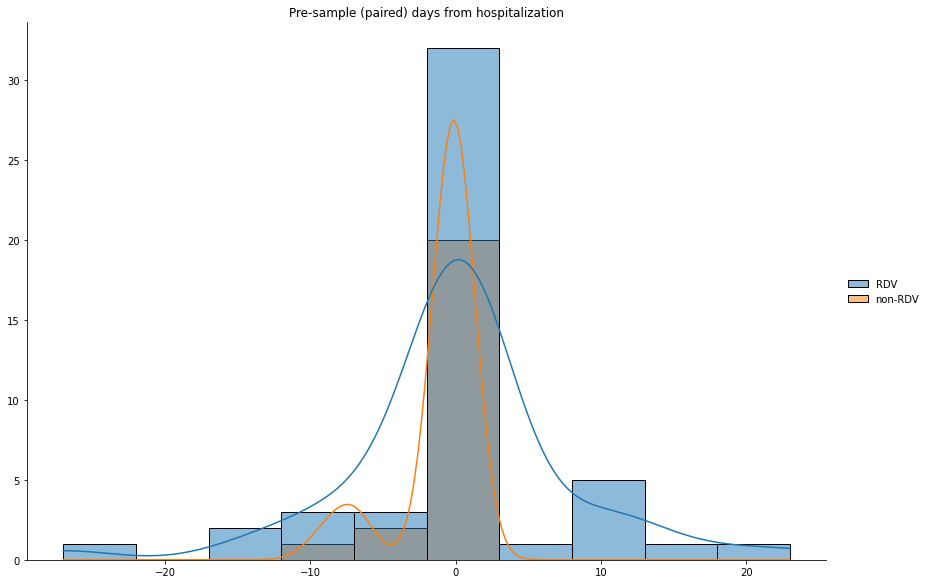

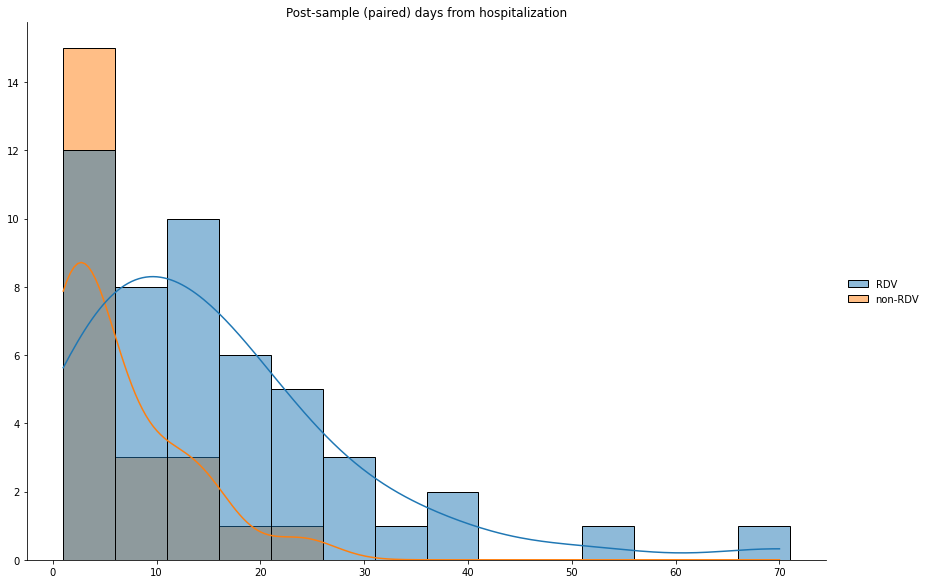

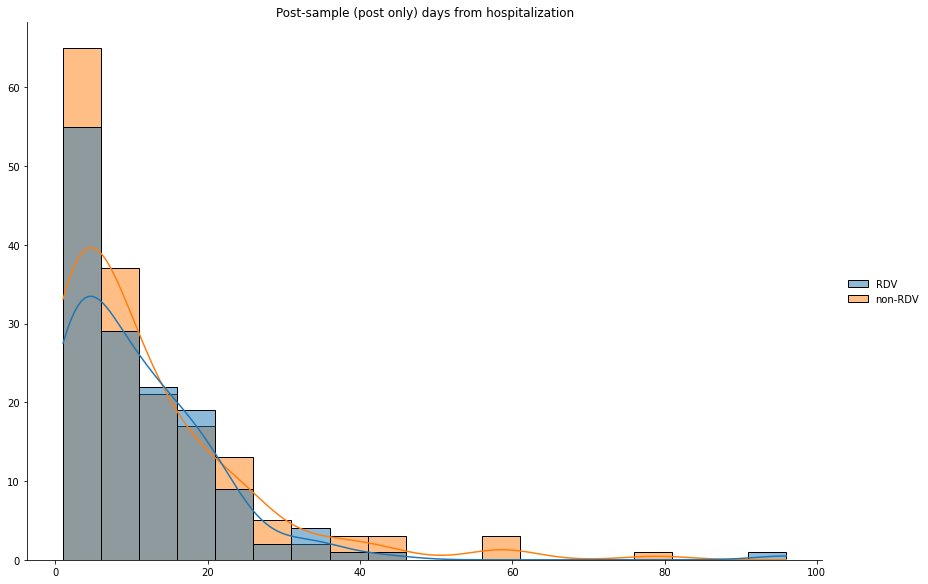

In [112]:
namelist =['Pre-sample (paired) days from hospitalization','Post-sample (paired) days from hospitalization','Post-sample (post only) days from hospitalization']
datalist = [[rdvpre, nordvpre], [rdvpost, nordvpost], [rdvonlypost, nordvonlypost]]

for d in range(len([[rdvpre, nordvpre], [rdvpost, nordvpost], [rdvonlypost, nordvonlypost]])):
    data = datalist[d]
    name = namelist[d]
    sns.displot(pd.DataFrame(data,index = ['RDV', 'non-RDV']).transpose(), binwidth = 5, kde = True, height = 8, aspect = 1.5)
    plt.title(name)
    plt.ylabel('')
#     plt.savefig('/Users/tlh4362/Desktop//{}.eps'.format(name), format = 'eps', bbox_inches = 'tight')
    plt.show()
    plt.close()


In [113]:

for mrn in rdv_hosp[rdv_hosp['daysdiff_rdv_hosp']>90]['mrn']:
    print(rdv_hosp[rdv_hosp['mrn']==mrn].loc[:,['record_id', 'sample_date','rdvdate','ca_hosp_admit_dt','daysdiff_rdv_hosp']])

In [114]:

for mrn in rdv_hosp[rdv_hosp['daysdiff_rdv_hosp']<-50]['mrn']:
    print(rdv_hosp[rdv_hosp['mrn']==mrn].loc[:,['record_id', 'sample_date','rdvdate','ca_hosp_admit_dt','daysdiff_rdv_hosp','sample_type']])

In [115]:
tmp = pd.merge(rdv_hosp, clinicaldata.loc[:,['record_id', 'ca_hosp_type']], on = 'record_id', how = 'left')

tmp = tmp.drop_duplicates()

In [116]:
for mrn in rdv_hosp['mrn'].unique():
    if any(x<0 for x in rdv_hosp[rdv_hosp['mrn']==mrn]['daysdiff_rdv_hosp'].unique()):
        print(tmp[tmp['mrn']==mrn]['ca_hosp_type'].unique())
    
    

In [117]:
for mrn in rdv_hosp['mrn'].unique():
    idx = rdv_hosp[rdv_hosp['mrn']==mrn].index
    rdv_hosp.at[idx,'lowest_days_hosp'] = rdv_hosp[rdv_hosp['mrn']==mrn].sort_values(by = 'daysdiff_sample_hosp')['daysdiff_sample_hosp'].iloc[0]
    
    

In [118]:
for mrn in nordv_hosp['mrn'].unique():
    idx = nordv_hosp[nordv_hosp['mrn']==mrn].index
#     print(nordv_hosp[nordv_hosp['mrn']==mrn].sort_values(by = 'sample_date', ascending = False).loc[:,['sample_date','daysdiff_sample_hosp']])
    nordv_hosp.at[idx,'lowest_days_hosp'] = nordv_hosp[nordv_hosp['mrn']==mrn].sort_values(by = 'sample_date', ascending = False)['daysdiff_sample_hosp'].iloc[0]
    
    

In [119]:
rdv_hosp = rdv_hosp.sort_values(by = 'sample_type')

In [120]:
rdvpaired = rdv_hosp[(rdv_hosp['sample_type']=='two_sample_paired') | (rdv_hosp['sample_type']=='three_plus_paired')]

In [121]:
nordvpaired = nordv_hosp[(nordv_hosp['sample_type']=='two_sample_paired') | (nordv_hosp['sample_type']=='three_plus_paired')]

paireddf = pd.concat([rdvpaired,nordvpaired])


In [122]:
sorted_idx = []
sorted_idx.extend(list(paireddf[paireddf['RDV'].notnull()].sort_values(by = 'daysdiff_sample_hosp').index))
sorted_idx.extend(list(paireddf[paireddf['RDV'].isnull()].sort_values(by = 'daysdiff_sample_hosp').index))

paireddf = paireddf.loc[sorted_idx,:]


In [123]:
# for x in paireddf['RDV']:
#     if str(x) == 'nan':
#         print(x)
#     else:
#         None
        
paireddf['rdv_hosp'] =  ['Hosp' if str(x) == 'nan' else 'RDV' for x in paireddf['RDV']]

In [124]:
paireddf = paireddf.drop_duplicates()

    sample_date  daysdiff_sample_hosp
292  2021-05-23                  24.0
291  2021-04-29                   0.0
[0.0, 24.0]
    sample_date  daysdiff_sample_hosp
281  2021-03-26                  22.0
280  2021-03-20                  16.0
279  2021-03-04                   0.0
[0.0, 22.0]
   sample_date  daysdiff_sample_hosp
15  2021-01-05                   0.0
16  2021-01-18                  13.0
17  2021-01-25                  20.0
[0.0, 20.0]
    sample_date  daysdiff_sample_hosp
238  2020-05-22                  17.0
237  2020-05-06                   1.0
236  2020-05-04                  -1.0
[-1.0, 17.0]
   sample_date  daysdiff_sample_hosp
85  2021-01-07                   0.0
86  2021-01-21                  14.0
[0.0, 14.0]
    sample_date  daysdiff_sample_hosp
303  2021-09-29                  -1.0
304  2021-10-13                  13.0
[-1.0, 13.0]
    sample_date  daysdiff_sample_hosp
222  2020-03-27                   2.0
219  2020-03-25                   0.0
221  2020-04-04      

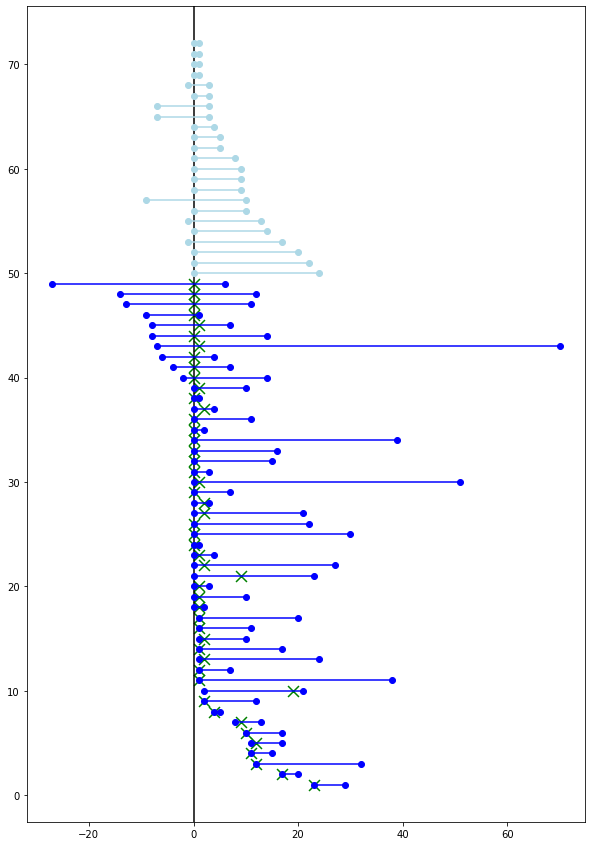

In [142]:
plt.figure(figsize = [10,15])
plt.axvline(x = 0, color = 'black')
rdv_sampleids = []
nordv_sampleids = []

count = 0
for rdv in paireddf['rdv_hosp'].unique():
    st_df = paireddf[paireddf['rdv_hosp']==rdv]
    st_df = st_df.sort_values(by = 'lowest_days_hosp', ascending = False)
    for m in range(len(st_df['mrn'].unique())):
        count += 1
        mrn = st_df['mrn'].unique()[m]
        if st_df[st_df['mrn']==mrn]['RDV'].isnull().sum()==0:
#             y = [count] * st_df[st_df['mrn']==mrn].shape[0]
            y = [count] * 2
            rdv_sampleids.extend(st_df[st_df['mrn']==mrn].sort_values(by = 'daysdiff_sample_hosp')['record_id'].values[0:2])
            plt.plot(st_df[st_df['mrn']==mrn]['daysdiff_sample_hosp'].sort_values()[0:2], y, marker = 'o', color = 'blue')
            plt.scatter(st_df[st_df['mrn']==mrn]['daysdiff_rdv_hosp'].iloc[0],count, color = 'green', marker = 'x', s = 120)
        else:
#             y = [count] * st_df[st_df['mrn']==mrn].shape[0]
            y = [count] * 2
#             print(st_df[st_df['mrn']==mrn].sort_values(by = 'daysdiff_sample_hosp').loc[:,['record_id']].iloc[0:2])
            nordv_sampleids.extend(st_df[st_df['mrn']==mrn].sort_values(by = 'daysdiff_sample_hosp')['record_id'].values[0:2])
#             print(st_df[st_df['mrn']==mrn].loc[:,['sample_date','daysdiff_sample_hosp']])
            print(st_df[st_df['mrn']==mrn].loc[:,['sample_date','daysdiff_sample_hosp']])
            print([st_df[st_df['mrn']==mrn]['daysdiff_sample_hosp'].sort_values().iloc[0], st_df[st_df['mrn']==mrn]['daysdiff_sample_hosp'].sort_values().iloc[-1]])
            plt.plot([st_df[st_df['mrn']==mrn]['daysdiff_sample_hosp'].sort_values().iloc[0], st_df[st_df['mrn']==mrn]['daysdiff_sample_hosp'].sort_values().iloc[-1]], y, marker = 'o', color = 'lightblue')
plt.savefig('/Users/tlh4362/Desktop/rdv_hosp_timeline.eps', format = 'eps', bbox_inches = 'tight')
    

In [232]:
nordvpost = nordv_hosp[(nordv_hosp['sample_type']=='one_sample_post') | (nordv_hosp['sample_type']=='multiple_sample_post')]


In [233]:
nordvpost[nordvpost['sample_type']=='multiple_sample_post']['mrn'].unique()

array([     1322460,      5281380,      5871000,      6891929,
            6995816,      7144832,      7435740,      7822933,
            8265225,      8278762,      8314586,      8466168,
            8541230,      8618399,      9011608,      9170995,
            9326444,     10071887,     10326008,     11199672,
       111011874710, 111012032131, 111012110900, 111012207957,
       111012325369, 111012966861, 111012975557, 111012986194,
       111012999279, 111013020039, 111013070579, 111013190378,
       111013241972, 111013254660, 111013576734, 111013984207,
       111014005639, 111014014202, 111014071113, 111014238565,
       111014398394, 111015175567])

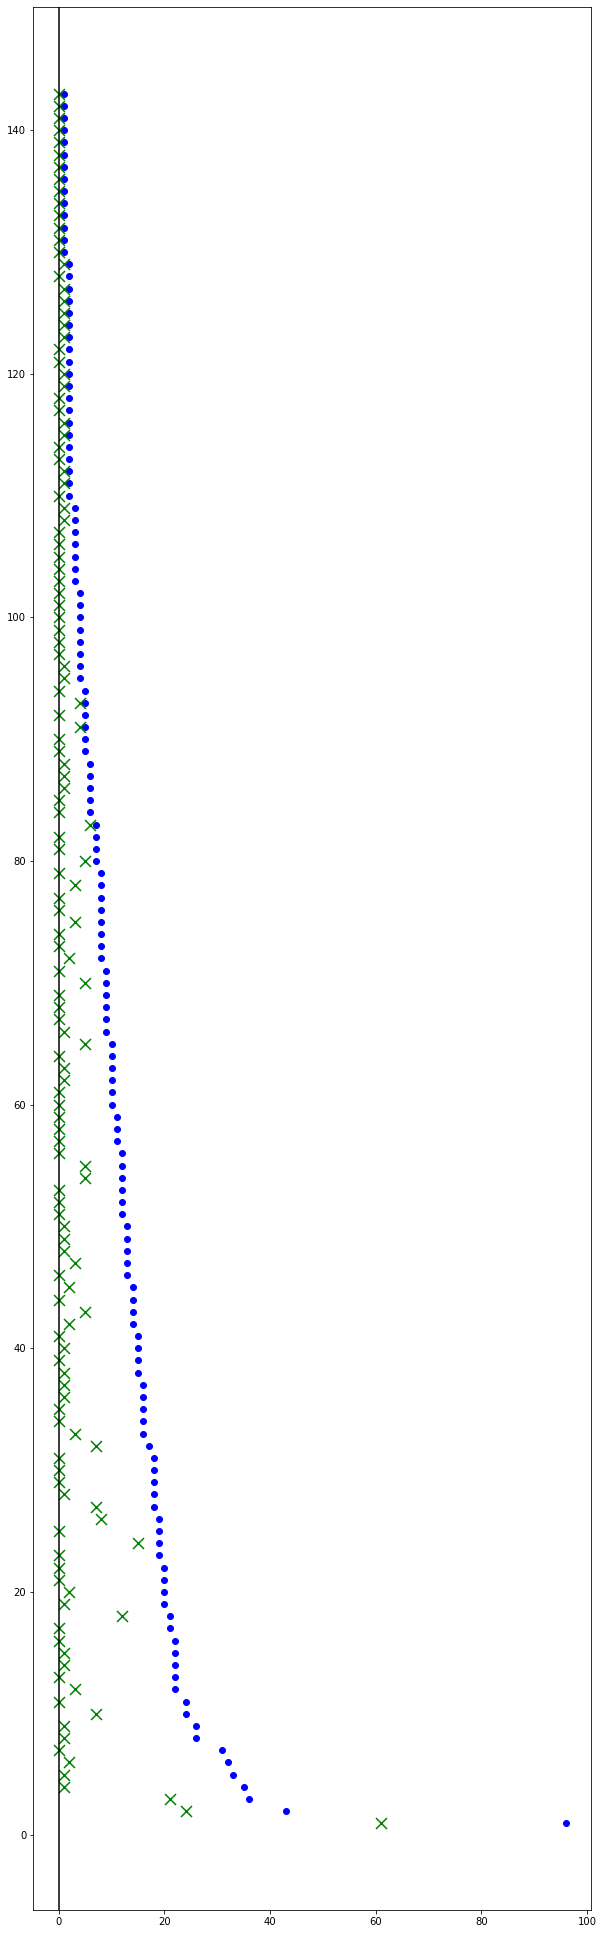

In [243]:

rdv_hosp = rdv_hosp.sort_values(by = 'sample_type')
rdvpost = rdv_hosp[(rdv_hosp['sample_type']=='one_sample_post') | (rdv_hosp['sample_type']=='multiple_sample_post')]
nordvpost = nordv_hosp[(nordv_hosp['sample_type']=='one_sample_post') | (nordv_hosp['sample_type']=='multiple_sample_post')]
postdf = pd.concat([rdvpost,nordvpost])
rdvcount = 0
hospcount = 0
rdv_post_list = []

postdf['rdv_hosp'] =  ['RDV' if str(x) == 'nan' else 'Hosp' for x in postdf['RDV']]
plt.figure(figsize = [10,35])
plt.axvline(x = 0, color = 'black')
for rdv in postdf['rdv_hosp'].unique():
    st_df = postdf[postdf['rdv_hosp']==rdv]
    st_df = st_df.sort_values(by = 'lowest_days_hosp', ascending = False)
    for m in range(len(st_df['mrn'].unique())):
        mrn = st_df['mrn'].unique()[m]

        if st_df[st_df['mrn']==mrn]['RDV'].isnull().sum()==0:
            rdvcount += 1

            y = [rdvcount]

#             y = [count] * st_df[st_df['mrn']==mrn].shape[0]
            plt.scatter(st_df[st_df['mrn']==mrn].sort_values(by = 'daysdiff_sample_hosp')['daysdiff_sample_hosp'].iloc[0], y, marker = 'o', color = 'blue')
            plt.scatter(st_df[st_df['mrn']==mrn]['daysdiff_rdv_hosp'].iloc[0],y, color = 'green', marker = 'x', s = 120)
            rdv_post_list.append(st_df[st_df['mrn']==mrn].sort_values(by = 'daysdiff_sample_hosp')['record_id'].iloc[0])
#         if st_df[st_df['mrn']==mrn]['RDV'].isnull().sum() > 0:
#             hospcount += 1
#             y = [hospcount]
#             plt.scatter(st_df[st_df['mrn']==mrn]['lowest_days_hosp'].iloc[0], y, marker = 'o', color = 'lightblue')

# plt.savefig('/Users/tlh4362/Desktop/hosp_timeline_post.eps', format = 'eps', bbox_inches = 'tight')

#     plt.savefig('/Users/tlh4362/Desktop/rdv_hosp_timeline_post.eps', format = 'eps', bbox_inches = 'tight')
    #     print(rdv_hosp[rdv_hosp['sample_type']==st])

In [129]:
# pd.Series(rdv_post_list).to_csv('/Users/tlh4362/Desktop/rdv_post_n143.csv')